## My Data Analysis

 ##### We need to first import necessary modules

In [1]:
import pandas as pd 
import os 

In [2]:
df = pd.read_csv('all_months_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Lets add a month column..

In [3]:
df['Month'] = df['Order Date'].str[:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### check for NaN in data

In [4]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### now lets remove all NaN values from the data frame

In [5]:
df = df.dropna(how = 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [6]:
df = df[df['Order Date'].str[:2] != 'Or']
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [8]:
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [13]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Now, lets find the month with highest sales

In [27]:
result = df.groupby('Month').sum()


#### looks like December was the highest grossing ^^^

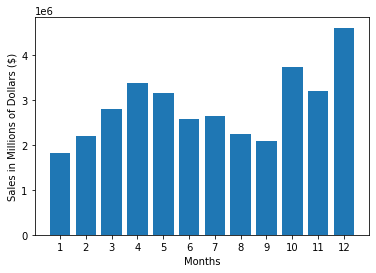

In [36]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, result["Sales"])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in Millions of Dollars ($)')

plt.show()

## looks like December had the highest sales

# What City had the highest number of sales?

In [49]:
def get_city (address):
    return address.split(',')[1]

def get_state (address):
    return address.split(',')[2].split(' ')[1]
    

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x) )
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


#### now that we have a city column, we can use groupby.() to inspect sales in each city

In [60]:
result = df.groupby(['City']).sum()

### lets graph this data with matplotlib

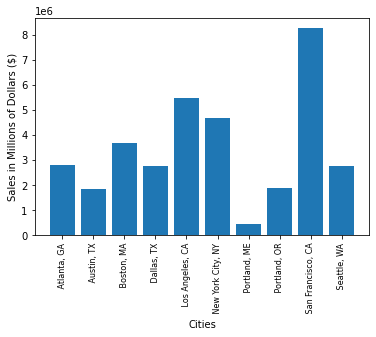

In [66]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('City')]

plt.bar(cities, result["Sales"])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in Millions of Dollars ($)')

plt.show()

### looks like san fran is the highest is sales ^

# What time of day should we display advertisements to maximize the likelihood of customers buying products?

In [75]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


#### Created a column for the hour^^

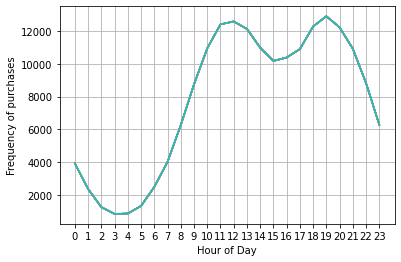

In [83]:
hour = [hour for hour, df in df.groupby('Hour')]


plt.plot(hour, df.groupby('Hour').count())
plt.xticks(hour)
plt.ylabel('Frequency of purchases')
plt.xlabel('Hour of Day')
plt.grid()
plt.show()

#### Graphed the freuquency of purchases at specific times in a day throughout the year^^